In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
256,41,72000,0
284,48,141000,0
213,35,58000,0
0,19,19000,0
388,47,34000,1


- It is recommended to do train test split before performing scaling.

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters (means from train set it will calculate mean and SD for all columns)
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

- Scaler learn from training data but tranform both train and test data.

In [10]:
X_train_scaled[:5]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654]])

- scaler always return numpy array
- we need to convert these into data frame for better understanding.

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
42,-0.967093,-0.746318
47,-0.967093,1.538287
95,-1.163172,0.410444
241,0.895664,-0.572804
117,-1.261212,0.583958


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of scaling

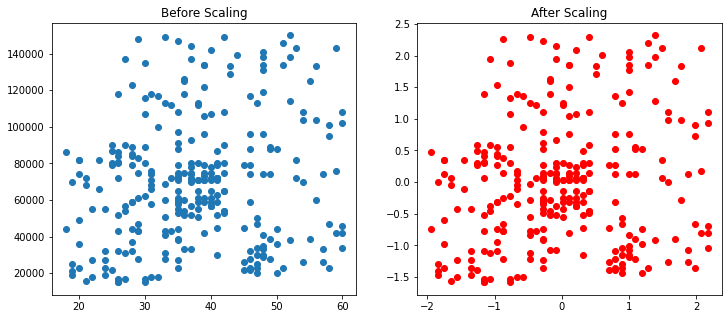

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

- There is no change in shape of distribution of data
- Only scale has changed
- Mean and SD has changed

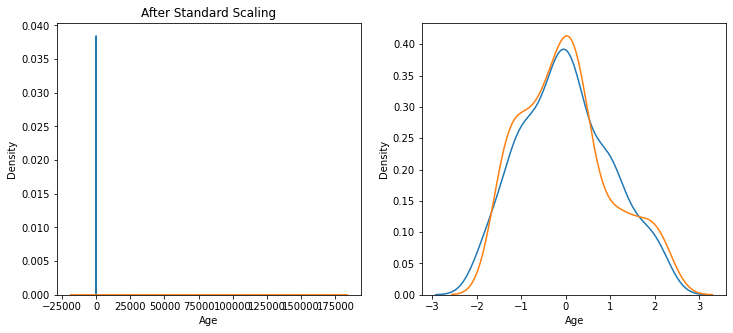

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

# after scaling
ax1.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)
plt.show()

## Comparison of Distribution

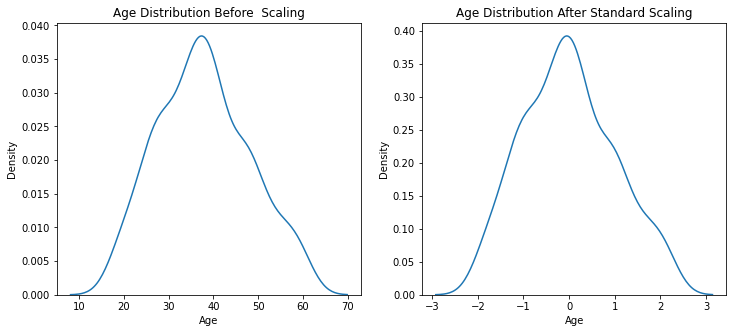

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Age Distribution Before  Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)


#after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

- There is no change in shape of distribution of Age column only scale has changed

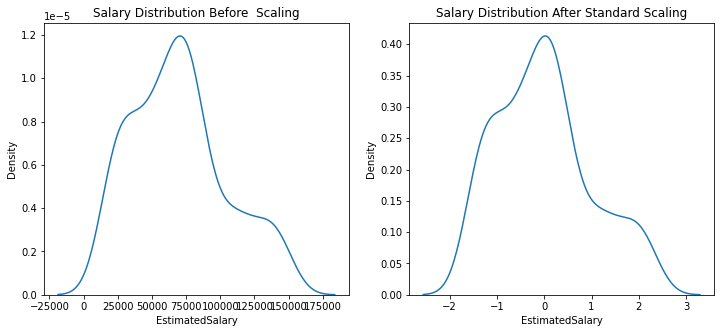

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Salary Distribution Before  Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


#after scaling
ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Points to be noted

- Shape of distribution of data never changes when scaling (Standardization) done
- Only scale changes
- Mean will become zero (Mean centring) and Standard Deviation will become 1 (Scaling by the factor of Standard Deviation)

## Why scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


## Point to be noted:

- Scaling is important when we use Logistic Regression
- Scaling improves result
- If scaling is not giving you any benefits than it will also not harm our model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


- Here we can see that in case of Decision Tree, Scaling does not improves accuracy
- So decision tree is an algorithms in which scaling does provide any effect.
- So for some algorithms like logistic regression,KNN and many more it improves score but for some it does not do any thing.

In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


- From above we can see that min age is 18 and max age is 60 same we can also see values for salary.

- Now what we will add some outliers in data to check the effect of outliers when scaling done.

## Effect of Outliers

In [32]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [33]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


In [34]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


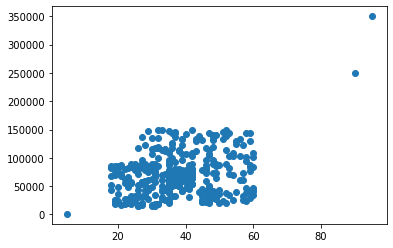

In [35]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

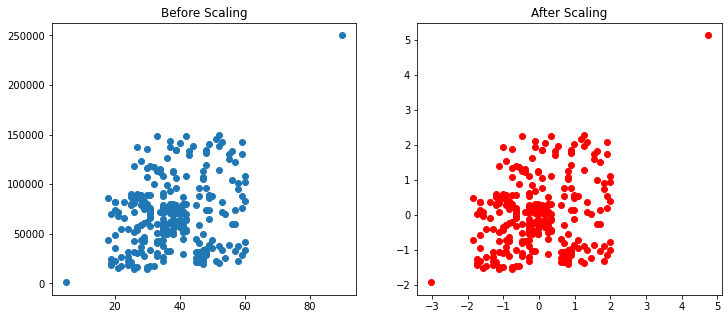

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

- After scaling (Standardization) also impact of outliers do not changes
- Outliers then are now also outliers
- So scaling (Standardization) does not do any thing to outliers, outliers will continue behaving like outliers only after scaling (Standardization) also. So we if we find any outliers in our data then we have to handle it explicitly before scaling.